# Regression:

Data Description- 
The dataset that we have picked is from Airbnb. The dataset contains details for over 3723 Airbnb listings in the US. We will be using this dataset and building a regression model that best predicts the price of these listings based on the various features/variables.

We picked this dataset from kaggle. Please find the link to that for reference:
https://www.kaggle.com/krisinbentley/airbnb/

The dataset has about 92 columns, some of which are either redundant or not useful for predicting the price. Please find below the list of columns in the dataset:

id, listing_url, scrape_id, last_scraped, name, summary, space, description, experiences_offered, neighborhood_overview,	notes, transit, thumbnail_url, medium_url, picture_url, xl_picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, street, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, city	state, zipcode, market, smart_location, country_code, country, latitude, longitude, is_location_exact, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities, square_feet, price, weekly_price, monthly_price, security_deposit, cleaning_fee, guests_included, extra_people, minimum_nights, maximum_nights, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, requires_license, license, jurisdiction_names, instant_bookable, cancellation_policy, require_guest_profile_picture, require_guest_phone_verification, calculated_host_listings_count, reviews_per_month


# Initial Data Cleaning:

To begin with, we will first remove all the columns that we can see as being not useful in our prediction. 
We will remove the following columns:

id, listing_url, scrape_id, last_scraped, name, summary, space, description, experiences_offered, neighborhood_overview, notes, thumbnail_url, medium_url, picture_url, xl_picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, requires_license, license, jurisdiction_names, require_guest_profile_picture, require_guest_phone_verification, calculated_host_listings_count

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(rc={'figure.figsize':(20,12)})



In [2]:
#Read the csv file
df= pd.read_csv('F:/Fall 2019/Applied ML/Project/airbnb.csv') 

#Drop the columns that we are sure will not be of any use in the model
df = df.drop(columns= ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'thumbnail_url', 'medium_url', 'picture_url','xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'requires_license', 'license', 'jurisdiction_names', 'require_guest_profile_picture', 'require_guest_phone_verification','calculated_host_listings_count'])
df.head()

,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,NaN,within a few hours,0.92,0.91,f,"3rd Street Southeast, Washington, DC 20003, Un...",Capitol Hill,"Capitol Hill, Lincoln Park",NaN,Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN
1,NaN,within a day,0.90,1.00,f,"11th Street Southeast, Washington, DC 20003, U...",Capitol Hill,"Capitol Hill, Lincoln Park",NaN,Washington,...,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,strict,2.11
2,NaN,within a day,0.90,1.00,f,"14th Place, Hyattsville, MD 20782, United States","Chillum, MD","Lamont Riggs, Queens Chapel, Fort Totten, Plea...",NaN,Hyattsville,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,1.00
3,NaN,within an hour,1.00,NaN,f,"O St, Washington, DC 20024, United States",NaN,"Southwest Employment Area, Southwest/Waterfron...",NaN,Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN
4,You can walk to the bus stop (1 min) Subway AN...,within a few hours,0.92,0.67,f,"East-West Highway, Silver Spring, MD 20910, Un...","Silver Spring, MD","Colonial Village, Shepherd Park, North Portal ...",NaN,Silver Spring,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN


# Removing Redundant Columns

Now, after removing the unnecessary columns for prediction, we look for redundant columns (that describe same/similar features) and try to eliminate them to increase our prediction accuracy.

Following is the list of columns we find redundant/repetitive:

transit, host_acceptance_rate, host_is_superhost, street, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, state, zipcode, market, smart_location, country_code, country, latitude, longitude, is_location_exact, weekly_price, monthly_price, security_deposit, cleaning_fee,  calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, square_feet, calendar_last_scraped,  first_review, last_review, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value,  instant_bookable, reviews_per_month


In [3]:
#Remove redundant columns
df = df.drop(columns= ['transit','host_acceptance_rate', 'host_is_superhost', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact','amenities', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'extra_people', 'cleaning_fee',  'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'square_feet', 'calendar_last_scraped',  'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable','reviews_per_month'])
df.head()

,host_response_time,host_response_rate,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,Breakfast,Smoking Allowed,Buzzer/Wireless Intercom,Price,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,cancellation_policy
0,within a few hours,0.92,Washington,House,Entire home/apt,4,1.0,1.0,2.0,Real Bed,...,False,False,False,160,1,1,1125,0,NaN,flexible
1,within a day,0.90,Washington,House,Entire home/apt,6,3.0,3.0,3.0,Real Bed,...,False,False,False,350,1,2,30,65,94.0,strict
2,within a day,0.90,Hyattsville,House,Private room,1,2.0,1.0,1.0,Real Bed,...,False,False,False,50,1,2,1125,1,NaN,flexible
3,within an hour,1.00,Washington,House,Private room,2,1.0,1.0,1.0,Real Bed,...,True,False,False,95,1,1,1125,0,NaN,flexible
4,within a few hours,0.92,Silver Spring,Townhouse,Entire home/apt,4,1.0,1.0,1.0,Real Bed,...,False,False,False,50,2,7,1125,0,NaN,flexible


# Selected Variables

For the linear regression model that we are building, 'Price' is our dependent variable.

Following are the list of independent variables.

host_response_time, host_response_rate, city, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, Kitchen, TV, Wireless Internet, Air Conditioning, Heating, Family/Kid Friendly, Washer, Dryer, Smoke Detector, First Aid Kit, Safety Card, Fire Extinguisher, Essentials, Shampoo, Parking, Pets, Indoor Fireplace, Carbon Monoxide Detector, Breakfast, Smoking Allowed, Buzzer/Wireless Intercom, guests_included, minimum_nights, maximum_nights, number_of_reviews, review_scores_rating, cancellation_policy

In [4]:
#List down all the columns
df.columns

Index(['host_response_time', 'host_response_rate', 'city', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'Kitchen', 'TV', 'Wireless Internet', 'Air Conditioning',
       'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector',
       'First Aid Kit', 'Safety Card', 'Fire Extinguisher', 'Essentials',
       'Shampoo', 'Parking ', 'Pets', 'Indoor Fireplace',
       'Carbon Monoxide Detector', 'Breakfast', 'Smoking Allowed',
       'Buzzer/Wireless Intercom', 'Price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'cancellation_policy'],
      dtype='object')

# Exploratory Data Analysis

Plotting some visualizations to better understand the variables in our model and to also understand the variability between them.
First, we perform correlation to understand the dependency between each of these variables.
From the plot below, we can see that Price is highly correlated to beds, bedrooms, accommodates, bathrooms & guests included.

In [5]:
# Find all correlations and sort 
correlations_data = df.corr()['Price'].sort_values()

# Print the most negative correlations
print(correlations_data)

number_of_reviews          -0.084339
Smoke Detector             -0.076801
Pets                       -0.034881
Essentials                 -0.031995
host_response_rate         -0.028140
First Aid Kit              -0.022155
Breakfast                  -0.015742
Safety Card                -0.011072
Wireless Internet          -0.010852
Smoking Allowed            -0.009512
Heating                    -0.008235
Shampoo                    -0.003903
Carbon Monoxide Detector   -0.002285
Fire Extinguisher           0.000456
Buzzer/Wireless Intercom    0.009415
Air Conditioning            0.011326
minimum_nights              0.014055
maximum_nights              0.014744
Kitchen                     0.026549
Parking                     0.034325
review_scores_rating        0.050812
Dryer                       0.077383
Washer                      0.080124
TV                          0.106650
Indoor Fireplace            0.109555
Family/Kid Friendly         0.171228
guests_included             0.302968
b

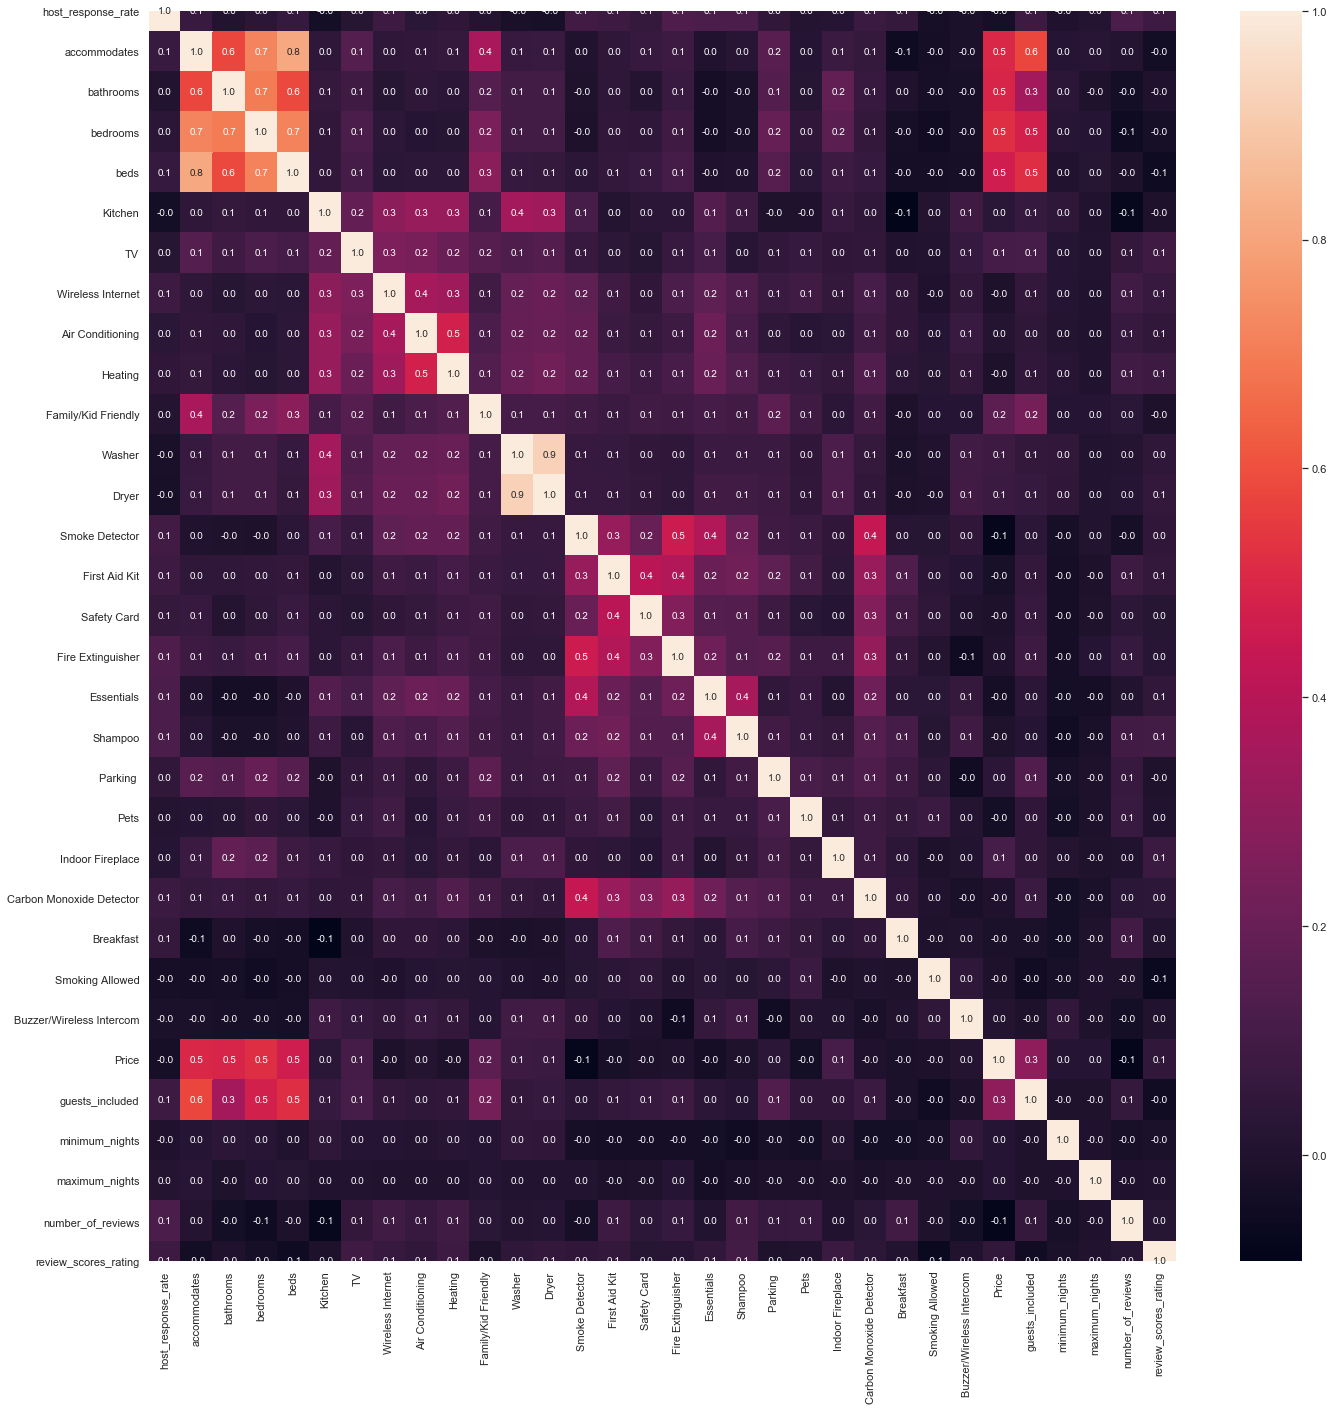

In [6]:
#we have plot a heat map to understand how each feature correlates to the other (Do they go hand in hand or are they inversely propotional)
f= plt.subplots(figsize=(23,23))
sns.heatmap(df.corr(),annot=True,fmt='.1f',color='green')  #We can use a simple seaborn method to draw the heatmaps

Now, we will check how price varies with the variables that show the highest correlation with it.

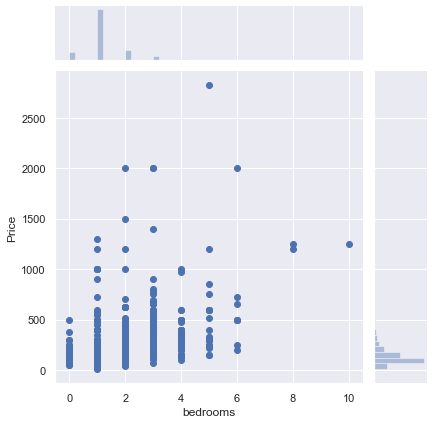

In [7]:
sns.jointplot('bedrooms','Price',data = df) #Price vs Bedrooms

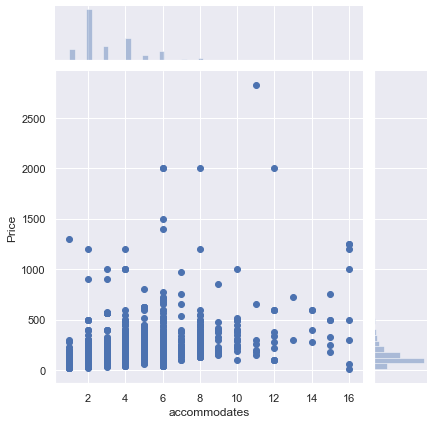

In [8]:
sns.jointplot('accommodates','Price',data = df) #Price vs Accommodates

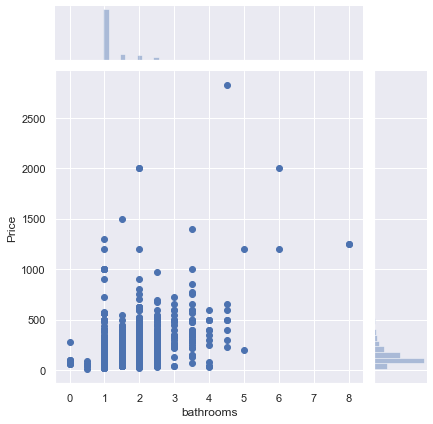

In [9]:
sns.jointplot('bathrooms','Price',data = df) #Price vs Bathrooms

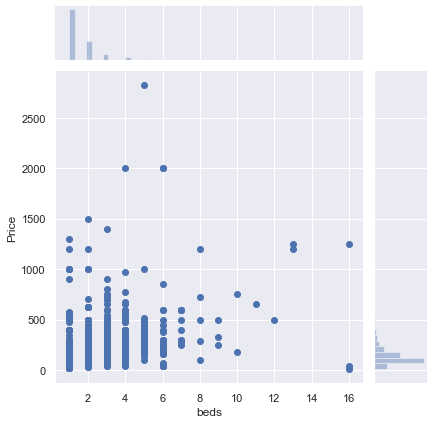

In [10]:
sns.jointplot('beds','Price',data = df) #Price vs Beds

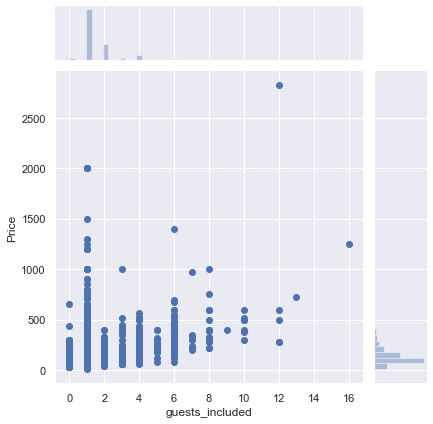

In [11]:
sns.jointplot('guests_included','Price',data = df) #Price vs Guests Included

# Categorical Variables

We need to first understand the distribution and behaviour of the categorical variables in the dataset to decide how to transform them.
For that, we will use the group by function to analyse the records based on host response time, city, property type, room type, bed type & cancellation policy. Based on the distribution of records in various categories, we will decide how to transform these variables.

In [12]:
df.groupby('host_response_time').size() #Check distribution of host response time

host_response_time
a few days or more      63
within a day           791
within a few hours    1159
within an hour        1276
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Host Response Time')

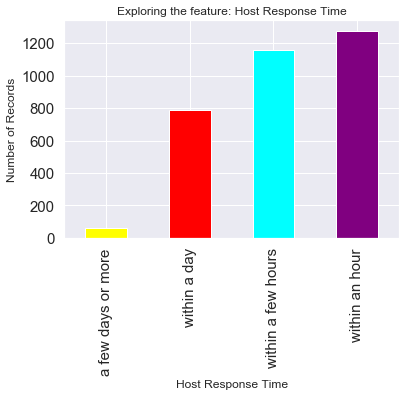

In [13]:
df.groupby(["host_response_time"]).size().plot(kind="bar",fontsize=15,color=['yellow', 'red', 'cyan','purple'])
plt.xlabel('Host Response Time')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Host Response Time')

In [14]:
df.groupby('city').size() #Check distribution of cities

city
Adams Morgan                          1
Annapolis                             1
Arlington                             1
Capitol Heights                       1
Capitol Hill, Washington              1
Columbia Heights, middle of DC!       1
Dupont Circle                         1
Hyattsville                           2
Mount Rainier                         5
New York                              1
Silver Spring                         8
Takoma Park                           6
Washington                         3628
Washington                            2
Washington, D.C.                     63
chevy chase                           1
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: City')

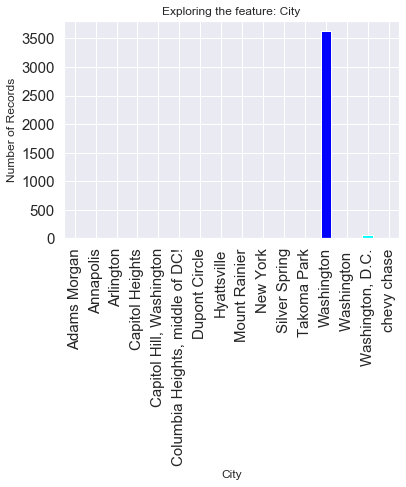

In [15]:
df.groupby(["city"]).size().plot(kind="bar",fontsize=15,color=['yellow', 'red', 'green', 'blue','coral', 'cyan','purple','pink','black'])
plt.xlabel('City')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: City')

In [16]:
df.groupby('property_type').size() #Check distribution of property type

property_type
Apartment          2259
Bed & Breakfast      55
Boat                  2
Bungalow              1
Cabin                 1
Condominium          86
Dorm                  2
House              1210
Loft                 24
Other                12
Townhouse            70
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Property Type')

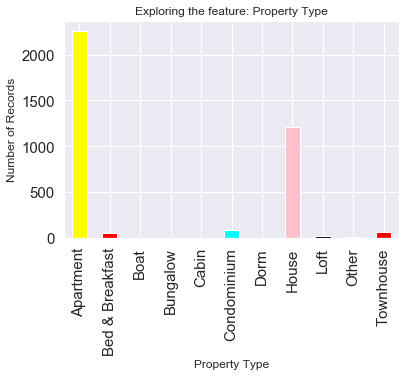

In [17]:
df.groupby(["property_type"]).size().plot(kind="bar",fontsize=15,color=['yellow', 'red', 'green', 'blue','coral', 'cyan','purple','pink','black'])
plt.xlabel('Property Type')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Property Type')

In [18]:
df.groupby('room_type').size() #Check distribution of room type

room_type
Entire home/apt    2419
Private room       1202
Shared room         102
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Room Type')

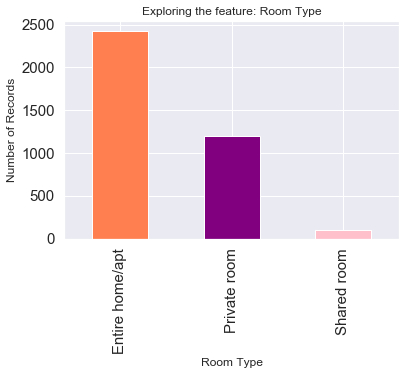

In [19]:
df.groupby(["room_type"]).size().plot(kind="bar",fontsize=15,color=['coral','purple','pink'])
plt.xlabel('Room Type')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Room Type')

In [20]:
df.groupby('bed_type').size() #Check distribution of bed type

bed_type
Airbed             37
Couch              13
Futon              55
Pull-out Sofa      48
Real Bed         3570
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Bed Type')

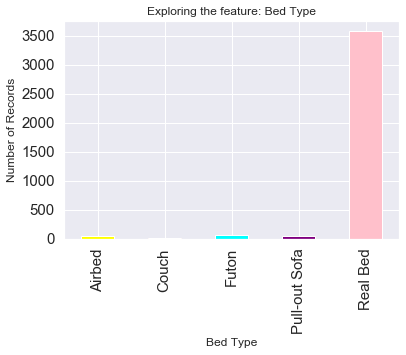

In [21]:
df.groupby(["bed_type"]).size().plot(kind="bar",fontsize=15,color=['yellow', 'red', 'cyan','purple','pink'])
plt.xlabel('Bed Type')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Bed Type')

In [22]:
df.groupby('cancellation_policy').size() #Check distribution of cancellation policy

cancellation_policy
flexible           1373
moderate           1099
strict             1189
super_strict_30      62
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Cancellation Policy')

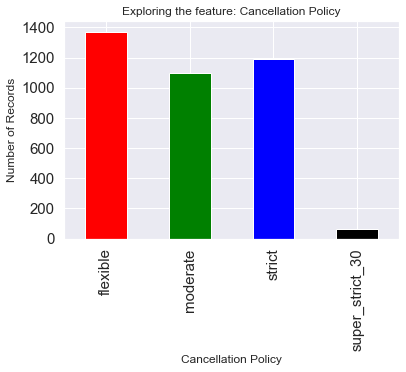

In [23]:
df.groupby(["cancellation_policy"]).size().plot(kind="bar",fontsize=15,color=['red', 'green', 'blue', 'black'])
plt.xlabel('Cancellation Policy')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Cancellation Policy')

Based on our analysis using the group by function. We decide on the following points:
- Based on the distribution of records, we will transform the host response time variable to have the following 3 categories: within an hour, within a few hours, within a day or more.
- Most of the listings are from Washington and we see some listings from other cities and so, we decide to transform the data in way that we have only 2 categories of city: Washington D.C. & Other.
- For property type, we see some irregularities and to deal with that we will transform the data to include only the following 3 categories of property type: Apartment, House & Other.
- For room type, the data seems fairly distributed and we will let these categories be as they are.
- For bed type, we see most of the listings are for real bed and and so, we decide to transform the data in way that we have only 2 categories of bed type: Real Bed & Other.
- For cancellation policy, the data seems fairly distributed and we will let these categories be as they are.

# Data Transformation

We will first transform our categorical variables based on the categories we defined in the previous step.
Next, we will convert all of them to binary variables using one hot vector. 
And in the end, we will be converting our boolean variables (All the amenities columns) to binary variables.

In [24]:
#Map all the host response time to within an hour, within a few hours, within a day or more.
df['host_response_time'] = df['host_response_time'].map({'a few days or more':'within a day or more', 'within a day':'within a day or more', 'within a few hours':'within a few hours', 'within an hour':'within an hour'})

#Verify the categories in host reponse time
df.groupby('host_response_time').size() 

host_response_time
within a day or more     854
within a few hours      1159
within an hour          1276
dtype: int64

In [25]:
#Map all the cities to either Washington, D.C. or Other
df['city'] = df['city'].map({'Adams Morgan':'Washington, D.C.', 'Annapolis':'Other', 'Arlington':'Other', 'Capitol Heights':'Other','Capitol Hill, Washington':'Washington, D.C.', 
                             'Columbia Heights, middle of DC!':'Washington, D.C.', 'Dupont Circle ':'Washington, D.C.', 'Hyattsville':'Other', 'Mount Rainier':'Other', 'New York':'Other', 
                             'Silver Spring':'Other', 'Takoma Park':'Other', 'Washington':'Washington, D.C.', 'Washington':'Washington, D.C.', 'chevy chase':'Other'})

#Verify the categories in city
df.groupby('city').size() 

city
Other                 26
Washington, D.C.    3631
dtype: int64

In [26]:
#Map all the property types to Apartment, House & Other.
df['property_type'] = df['property_type'].map({'Boat':'Other', 'Bungalow':'Other', 'Cabin':'Other', 'Dorm':'Other', 'Loft':'Other', 'Apartment':'Apartment','Bed & Breakfast':'Other','Condominium':'Other','House':'House','Townhouse':'Other','Other':'Other'})

#Verify the categories in property type
df.groupby('property_type').size() 

property_type
Apartment    2259
House        1210
Other         253
dtype: int64

In [27]:
#Map all the bed types to either Real Bed & Other
df['bed_type'] = df['bed_type'].map({'Airbed':'Other', 'Couch':'Other', 'Futon':'Other', 'Pull-out Sofa':'Other', 'Real Bed':'Real Bed'})

#Verify the categories in bed type
df.groupby('bed_type').size() 

bed_type
Other        153
Real Bed    3570
dtype: int64

In [28]:
#Converting response time to one hot vector
col1 = pd.get_dummies(df.host_response_time, prefix='Reponse_time')
del df['host_response_time']
df= pd.concat([df, col1], axis=1)

#Converting city to one hot vector
col2 = pd.get_dummies(df.city, prefix='City')
del df['city']
df= pd.concat([df, col2], axis=1)

#Converting property_type to one hot vector
col3 = pd.get_dummies(df.property_type, prefix='Property')
del df['property_type']
df= pd.concat([df, col3], axis=1)

#Converting room_type to one hot vector
col4 = pd.get_dummies(df.room_type, prefix='room')
del df['room_type']
df= pd.concat([df, col4], axis=1)

#Converting bed_type to one hot vector
col5 = pd.get_dummies(df.bed_type, prefix='bed')
del df['bed_type']
df= pd.concat([df, col5], axis=1)

#Converting cancellation_policy to one hot vector
col6 = pd.get_dummies(df.cancellation_policy, prefix='cancellation')
del df['cancellation_policy']
df= pd.concat([df, col6], axis=1)

#Convert all amenities to 0 & 1
df['Kitchen'] = df['Kitchen'].map({False:0, True:1})
df['TV'] = df['TV'].map({False:0, True:1})
df['Wireless Internet'] = df['Wireless Internet'].map({False:0, True:1})
df['Air Conditioning'] = df['Air Conditioning'].map({False:0, True:1})
df['Heating'] = df['Heating'].map({False:0, True:1})
df['Family/Kid Friendly'] = df['Family/Kid Friendly'].map({False:0, True:1})
df['Washer'] = df['Washer'].map({False:0, True:1})
df['Dryer'] = df['Dryer'].map({False:0, True:1})
df['Smoke Detector'] = df['Smoke Detector'].map({False:0, True:1})
df['First Aid Kit'] = df['First Aid Kit'].map({False:0, True:1})
df['Safety Card'] = df['Safety Card'].map({False:0, True:1})
df['Fire Extinguisher'] = df['Fire Extinguisher'].map({False:0, True:1})
df['Essentials'] = df['Essentials'].map({False:0, True:1})
df['Shampoo'] = df['Shampoo'].map({False:0, True:1})
df['Pets'] = df['Pets'].map({False:0, True:1})
df['Indoor Fireplace'] = df['Indoor Fireplace'].map({False:0, True:1})
df['Carbon Monoxide Detector'] = df['Carbon Monoxide Detector'].map({False:0, True:1})
df['Breakfast'] = df['Breakfast'].map({False:0, True:1})
df['Smoking Allowed'] = df['Smoking Allowed'].map({False:0, True:1})
df['Buzzer/Wireless Intercom'] = df['Buzzer/Wireless Intercom'].map({False:0, True:1})

df.head()

,host_response_rate,accommodates,bathrooms,bedrooms,beds,Kitchen,TV,Wireless Internet,Air Conditioning,Heating,...,Property_Other,room_Entire home/apt,room_Private room,room_Shared room,bed_Other,bed_Real Bed,cancellation_flexible,cancellation_moderate,cancellation_strict,cancellation_super_strict_30
0,0.92,4,1.0,1.0,2.0,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
1,0.90,6,3.0,3.0,3.0,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
2,0.90,1,2.0,1.0,1.0,1,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0
3,1.00,2,1.0,1.0,1.0,1,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0
4,0.92,4,1.0,1.0,1.0,1,1,1,1,1,...,1,1,0,0,0,1,1,0,0,0


In [29]:
df.shape #Check the number of rows & columns in the dataset

(3723, 49)

# Understanding the Data

We start by understanding the columns and data types of all columns before we finally start building our model.

In [30]:
df.info() #Check the datatype for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 49 columns):
host_response_rate                   3289 non-null float64
accommodates                         3723 non-null int64
bathrooms                            3696 non-null float64
bedrooms                             3702 non-null float64
beds                                 3712 non-null float64
Kitchen                              3723 non-null int64
TV                                   3723 non-null int64
Wireless Internet                    3723 non-null int64
Air Conditioning                     3723 non-null int64
Heating                              3723 non-null int64
Family/Kid Friendly                  3723 non-null int64
Washer                               3723 non-null int64
Dryer                                3723 non-null int64
Smoke Detector                       3723 non-null int64
First Aid Kit                        3723 non-null int64
Safety Card                   

In [31]:
df.columns #Checking the columns we are using in the model

Index(['host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'Kitchen', 'TV', 'Wireless Internet', 'Air Conditioning', 'Heating',
       'Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector',
       'First Aid Kit', 'Safety Card', 'Fire Extinguisher', 'Essentials',
       'Shampoo', 'Parking ', 'Pets', 'Indoor Fireplace',
       'Carbon Monoxide Detector', 'Breakfast', 'Smoking Allowed',
       'Buzzer/Wireless Intercom', 'Price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'Reponse_time_within a day or more',
       'Reponse_time_within a few hours', 'Reponse_time_within an hour',
       'City_Other', 'City_Washington, D.C.', 'Property_Apartment',
       'Property_House', 'Property_Other', 'room_Entire home/apt',
       'room_Private room', 'room_Shared room', 'bed_Other', 'bed_Real Bed',
       'cancellation_flexible', 'cancellation_moderate', 'cancellation_strict',
       'cancellation

# Split the data

Now we will split the data into training and test sets. We will keep 75% of the data to train the model and keep 25% of the data to test the model that we build

In [32]:
#Resetting the index to eliminate any infinite values
df = df.reset_index()

#Defining our dependent and independent variables 
X = df[['host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds','Kitchen', 'TV', 'Wireless Internet', 
        'Air Conditioning', 'Heating','Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector', 'First Aid Kit', 
        'Safety Card', 'Fire Extinguisher', 'Essentials', 'Shampoo', 'Parking ', 'Pets', 'Indoor Fireplace', 
        'Carbon Monoxide Detector', 'Breakfast', 'Smoking Allowed', 'Buzzer/Wireless Intercom', 'guests_included',
        'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'Reponse_time_within a day or more',
        'Reponse_time_within a few hours', 'Reponse_time_within an hour', 'City_Other', 'City_Washington, D.C.', 'Property_Apartment',
        'Property_House', 'Property_Other', 'room_Entire home/apt','room_Private room', 'room_Shared room', 'bed_Other', 
        'bed_Real Bed', 'cancellation_flexible', 'cancellation_moderate', 'cancellation_strict', 'cancellation_super_strict_30']]
y = df['Price']

In [33]:
#Split the data to train and test sets
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

#Check the number of records in training and test partitions
print("X_train unscaled : " + str(X_train_org.shape))
print("X_test unscaled: " + str(X_test_org.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train unscaled : (2792, 48)
X_test unscaled: (931, 48)
y_train : (2792,)
y_test : (931,)


# Data Imputation

Now, we check for null values in training and test sets and try to eliminate them. We replace all the missing values with the mean in all the data sets.

In [34]:
#Training set- independent variables
X_train_org.isna().sum()  #Check null values

host_response_rate                   328
accommodates                           0
bathrooms                             19
bedrooms                              16
beds                                   8
Kitchen                                0
TV                                     0
Wireless Internet                      0
Air Conditioning                       0
Heating                                0
Family/Kid Friendly                    0
Washer                                 0
Dryer                                  0
Smoke Detector                         0
First Aid Kit                          0
Safety Card                            0
Fire Extinguisher                      0
Essentials                             0
Shampoo                                0
Parking                                0
Pets                                   0
Indoor Fireplace                       0
Carbon Monoxide Detector               0
Breakfast                              0
Smoking Allowed 

In [35]:
#Replace all other NaN values in the dataset with the mean
X_train_org = X_train_org.fillna(X_train_org.mean()) 
X_train_org.isna().sum()

host_response_rate                   0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
Kitchen                              0
TV                                   0
Wireless Internet                    0
Air Conditioning                     0
Heating                              0
Family/Kid Friendly                  0
Washer                               0
Dryer                                0
Smoke Detector                       0
First Aid Kit                        0
Safety Card                          0
Fire Extinguisher                    0
Essentials                           0
Shampoo                              0
Parking                              0
Pets                                 0
Indoor Fireplace                     0
Carbon Monoxide Detector             0
Breakfast                            0
Smoking Allowed                      0
Buzzer/Wireless Intercom 

In [36]:
#Training set- target variable
y_train.isna().sum()  #Check null values

0

In [37]:
#Test set- independent variables
X_test_org.isna().sum()  #Check null values

host_response_rate                   106
accommodates                           0
bathrooms                              8
bedrooms                               5
beds                                   3
Kitchen                                0
TV                                     0
Wireless Internet                      0
Air Conditioning                       0
Heating                                0
Family/Kid Friendly                    0
Washer                                 0
Dryer                                  0
Smoke Detector                         0
First Aid Kit                          0
Safety Card                            0
Fire Extinguisher                      0
Essentials                             0
Shampoo                                0
Parking                                0
Pets                                   0
Indoor Fireplace                       0
Carbon Monoxide Detector               0
Breakfast                              0
Smoking Allowed 

In [38]:
#Replace all other NaN values in the dataset with the mean
X_test_org = X_test_org.fillna(X_test_org.mean()) 
X_test_org.isna().sum()

host_response_rate                   0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
Kitchen                              0
TV                                   0
Wireless Internet                    0
Air Conditioning                     0
Heating                              0
Family/Kid Friendly                  0
Washer                               0
Dryer                                0
Smoke Detector                       0
First Aid Kit                        0
Safety Card                          0
Fire Extinguisher                    0
Essentials                           0
Shampoo                              0
Parking                              0
Pets                                 0
Indoor Fireplace                     0
Carbon Monoxide Detector             0
Breakfast                            0
Smoking Allowed                      0
Buzzer/Wireless Intercom 

In [39]:
#Test set- target variable
y_test.isna().sum()  #Check null values

0

# Data Scaling

In [40]:
#Standardize the training and test sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#Check the number of records in training and test partitions
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (2792, 48)
X_test : (931, 48)
y_train : (2792,)
y_test : (931,)


# Regression Models

# 1. KNN Regressor with scaled data

Text(0, 0.5, 'MSE')

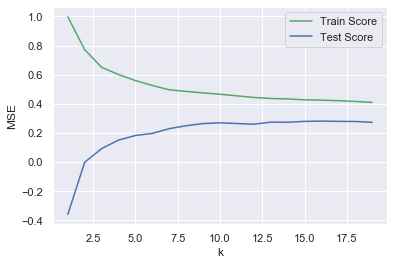

In [41]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [42]:
#Based on above graph we selected 17 as the best number of neighbours
knn_reg1 = KNeighborsRegressor(17)
knn_reg1.fit(X_train, y_train)
print(knn_reg1.score(X_train, y_train))
print(knn_reg1.score(X_test, y_test))

0.42120114169238526
0.27943532211815203


# 2. KNN Regressor (scaled data) with grid search

In [43]:
# we will now use grid search and cross-validation

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':range(1,20),'weights': ['distance','uniform']}
model = GridSearchCV(knn_reg, params)
model.fit(X_train,y_train)
model.best_params_

c:\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_neighbors': 11, 'weights': 'distance'}

In [44]:
#Train the model using the training sets
model.fit(X_train, y_train)

print ("Train Score:",model.score(X_train, y_train))
print ("Test Score :",model.score(X_test, y_test))

#Predict the response for test dataset
y_pred = model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_Score:",r2_score(y_test, y_pred))

c:\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train Score: 0.9980437538197017
Test Score : 0.26944984743974165
MAE: 47.12417220893858
MSE: 10091.582519697828
RMSE: 100.4568689522913
r2_Score: 0.26944984743974165


# 3. KNN Regressor with unscaled data

Text(0, 0.5, 'MSE')

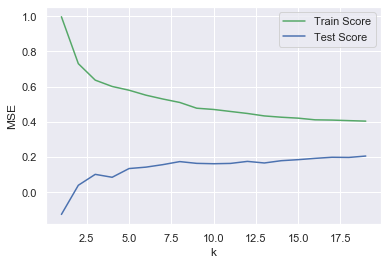

In [45]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_org, y_train)
    train_score_array.append(knn_reg.score(X_train_org, y_train))
    test_score_array.append(knn_reg.score(X_test_org, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [46]:
#Based on above graph we selected 17 as the best number of neighbours
knn_reg1 = KNeighborsRegressor(17)
knn_reg1.fit(X_train_org, y_train)
print(knn_reg1.score(X_train_org, y_train))
print(knn_reg1.score(X_test_org, y_test))

0.4100088061204008
0.19860662257973694


# 4. KNN Regressor (unscaled data) with grid search

In [47]:
# we will now use grid search and cross-validation

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':range(1,20),'weights': ['distance','uniform']}
model = GridSearchCV(knn_reg, params)
model.fit(X_train_org,y_train)
model.best_params_

c:\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_neighbors': 6, 'weights': 'distance'}

In [48]:
#Train the model using the training sets
model.fit(X_train_org, y_train)

print ("Train Score:",model.score(X_train_org, y_train))
print ("Test Score :",model.score(X_test_org, y_test))

#Predict the response for test dataset
y_pred = model.predict(X_test_org)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_Score:",r2_score(y_test, y_pred))

c:\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train Score: 0.9980392592978414
Test Score : 0.15670514643632627
MAE: 55.167435057988016
MSE: 11649.001199096128
RMSE: 107.9305387696
r2_Score: 0.15670514643632627


# 5. Linear Regression with Scaled data

In [48]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
yPrediction = lreg.predict(X_test)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.40996811853593834
0.32642357622275736


Text(0.5, 0, 'RM')

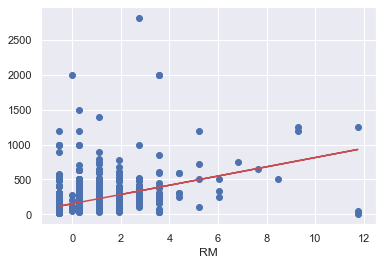

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,4].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

In [50]:
from sklearn import metrics
print("Intercept:",lreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, yPrediction))
print('MSE:', metrics.mean_squared_error(y_test, yPrediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPrediction)))

from sklearn.metrics import r2_score
print("r2_Score:",r2_score(y_test, yPrediction))

Intercept: 151.15007163323781
MAE: 50.28356498471717
MSE: 9304.565935752538
RMSE: 96.46017797906315
r2_Score: 0.3264235762227573


# 6. Linear Regression with unscaled data

In [51]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_org, y_train)
yPrediction = lreg.predict(X_test_org)
print(lreg.score(X_train_org, y_train))
print(lreg.score(X_test_org, y_test))

0.410056232285299
0.32560470251655105


In [52]:
from sklearn import metrics
print("Intercept:",lreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, yPrediction))
print('MSE:', metrics.mean_squared_error(y_test, yPrediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPrediction)))

from sklearn.metrics import r2_score
print("r2_Score:",r2_score(y_test, yPrediction))

Intercept: -0.32830307865600616
MAE: 50.3498258908237
MSE: 9315.877591154196
RMSE: 96.51879397896658
r2_Score: 0.32560470251655105


# 7. SGD Regressor with scaled data

In [53]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

-4.231827307365721e+19
-5.85506299685032e+19


In [54]:
sgd_reg.coef_

array([-7.64303971e+10,  1.29459665e+11, -3.18943063e+11,  2.22644100e+11,
       -1.68175048e+10,  1.66624817e+11, -2.23748307e+11,  5.36674530e+10,
       -1.44213823e+11, -1.40471339e+11,  1.44975990e+11,  2.80695461e+10,
        6.46939134e+10, -9.87022552e+10, -9.90641538e+10,  2.91418310e+10,
       -7.82189584e+10, -6.11026778e+09, -4.91820014e+10, -7.61655859e+10,
       -1.17531803e+10, -1.06863392e+11, -6.71540982e+09,  5.81143965e+10,
        6.07483167e+09,  4.89669235e+10, -4.25978155e+10,  8.96315688e+10,
       -4.62101702e+11, -3.04428433e+11,  1.53781443e+11,  3.29059876e+10,
       -4.86963199e+10, -4.27803105e+10,  3.37811105e+11,  4.39113217e+10,
       -1.33772477e+11, -1.51783471e+11, -2.15245788e+10,  3.30664673e+10,
        1.67182305e+10, -1.40465351e+11, -2.71067679e+10,  2.71067679e+10,
       -1.11625633e+11, -4.70434125e+10,  1.13928345e+11,  1.68667254e+11])

In [55]:
sgd_reg.intercept_

array([1.46539645e+11])

# 8. SGD Regressor with unscaled data

In [56]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train_org, y_train)
print(sgd_reg.score(X_train_org, y_train))
print(sgd_reg.score(X_test_org, y_test))

-3.252852361642884e+48
-2.5990411360463228e+39


In [57]:
sgd_reg.coef_

array([-6.44274480e+14, -2.30090955e+15, -9.16262221e+14, -9.07898071e+14,
       -1.26649828e+15, -6.61157083e+14, -5.35979864e+14, -6.63577579e+14,
       -6.69456125e+14, -6.54241214e+14, -3.43718662e+14, -5.56035882e+14,
       -5.53269535e+14, -5.21456482e+14, -1.94335904e+14, -8.16072478e+13,
       -3.27120578e+14, -5.12465853e+14, -3.36802794e+14, -2.21999378e+14,
       -1.88803209e+14, -1.39354749e+14, -2.80092673e+14, -5.32521871e+13,
       -1.03738027e+13, -1.05121201e+14, -1.22307140e+15, -1.59721999e+15,
        6.51417163e+18, -9.54735693e+15, -6.57450586e+16, -1.62177173e+14,
       -2.52083405e+14, -2.15083509e+14, -7.60745531e+12, -6.81213101e+14,
       -4.27054935e+14, -2.29952626e+14, -5.04858398e+13, -4.66129592e+14,
       -2.06784467e+14, -3.38877555e+13, -3.94204502e+13, -6.67381364e+14,
       -2.35139528e+14, -2.02289152e+14, -2.53812372e+14, -1.55607620e+13])

In [58]:
sgd_reg.intercept_

array([2.07898435e+15])

# 9. Polynomial Regression with scaled data

In [59]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [60]:
print(train_score_list)
print(test_score_list)

[0.4100557264968089, 0.7379711675683667]
[0.32557020687116955, -9.695808256877784e+19]


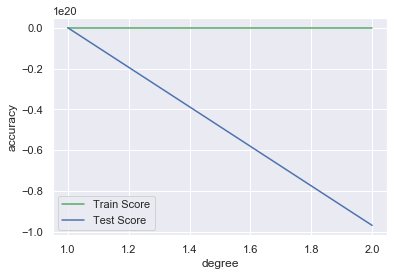

In [61]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

# 10. Polynomial Regression with unscaled data

In [62]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_org)
    X_test_poly = poly.transform(X_test_org)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [63]:
print(train_score_list)
print(test_score_list)

[0.41005623228529897, 0.38440092268067105]
[0.325604702389663, 0.26440624747249586]


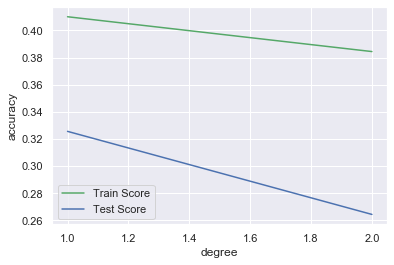

In [64]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

# 11. Ridge with scaled data

In [65]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

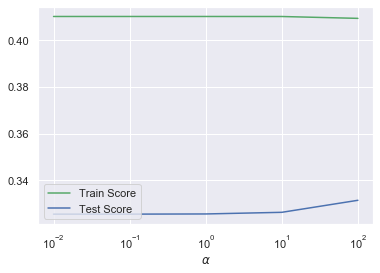

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [67]:
print(train_score_list)
print(test_score_list)

[0.4100562322630408, 0.41005623015595993, 0.41005607161694313, 0.4100449242860694, 0.4092521592040633]
[0.3256055589229411, 0.3256132422659269, 0.32568823672583225, 0.326388746697325, 0.3315290019116983]


In [68]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)

y_pred=ridge.predict(X_test)

print('Train score: {:.4f} '.format(ridge.score(X_train, y_train)))
print('Test score: {:.4f} '.format(ridge.score(X_test, y_test)))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 0.4100 
Test score: 0.3264 
RMSE: 96.4627


In [69]:
ridge.coef_

array([-1.43486336e+00,  2.61021380e+01,  3.18166786e+01,  3.64100567e+01,
       -2.13420967e+00, -6.20739722e+00,  2.12407292e+00,  1.69956249e-02,
       -1.06844951e+00, -1.45290846e+00, -1.80447549e+00,  1.71208925e+00,
        2.73078867e+00, -8.38534226e+00,  1.75635970e+00, -5.16173502e+00,
       -1.74837502e-01,  3.61954054e+00,  5.69534854e+00, -5.65394605e+00,
       -2.60370466e+00,  5.85538251e+00, -9.69033246e-01,  4.88829662e+00,
        5.56441322e-01, -1.28800250e+00,  2.17974345e-01, -2.60514079e+00,
        1.33853583e+00, -6.12013398e+00,  5.26258949e+00, -2.45421854e+01,
       -2.32922312e+01, -3.12706210e+01, -6.97926221e-01,  2.79159933e+00,
        3.23147011e+00, -4.07966658e+00, -7.08566211e-01,  1.09273053e+01,
       -8.94007757e+00, -6.18605857e+00, -7.08744388e-01,  7.08744388e-01,
       -7.97089541e-01, -4.63581658e+00,  2.54919044e+00,  9.85023372e+00])

In [70]:
ridge.intercept_

151.15007163323784

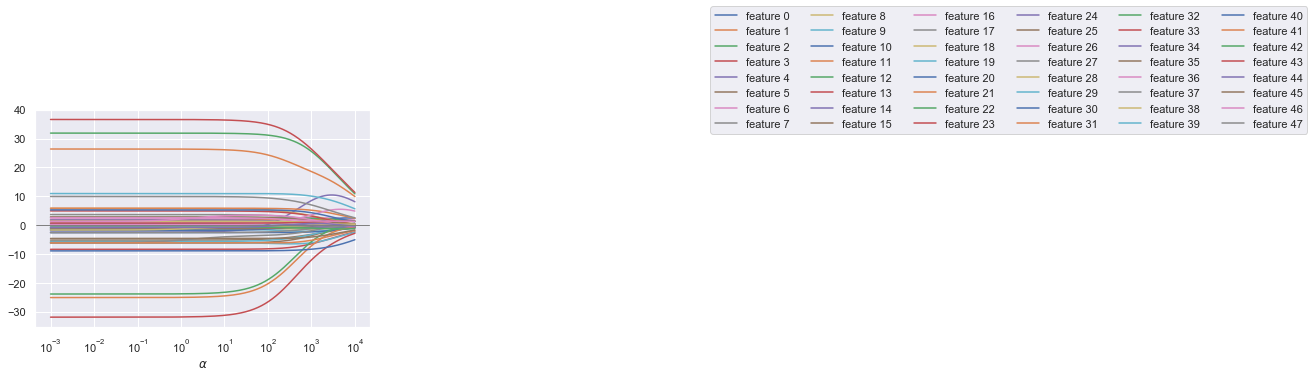

In [76]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,48):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(2, 1.5),
          ncol=6)
plt.show()

# 12. Ridge (scaled data) with Grid search

In [71]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0,10,100])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
yPrediction2=grid.predict(X_test)

# summarize the results of the grid search
print ("Train Score:",grid.score(X_train, y_train))
print ("Test Score :",grid.score(X_test, y_test))
print("Best_Value_For_Alpha:",grid.best_estimator_.alpha)

c:\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train Score: 0.4092521592040633
Test Score : 0.3315290019116983
Best_Value_For_Alpha: 100.0


c:\python36\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, yPrediction2))
print('MSE:', metrics.mean_squared_error(y_test, yPrediction2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPrediction2)))
print("r2_Score:",r2_score(y_test, yPrediction2))

MAE: 49.624316008019
MSE: 9234.041243563272
RMSE: 96.09391886879872
r2_Score: 0.3315290019116983


# 13. Ridge with unscaled data

In [73]:
from  sklearn.linear_model import Ridge

x_range = [ 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_org,y_train)
    train_score_list.append(ridge.score(X_train_org,y_train))
    test_score_list.append(ridge.score(X_test_org, y_test))

c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16889e-21): result may not be accurate.
  overwrite_a=True).T
c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16692e-20): result may not be accurate.
  overwrite_a=True).T
c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15391e-19): result may not be accurate.
  overwrite_a=True).T
c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.92785e-18): result may not be accurate.
  overwrite_a=True).T
c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82075e-17): result may not be accurate.
  overwrite_a=True).T


Text(0.5, 0, '$\\alpha$')

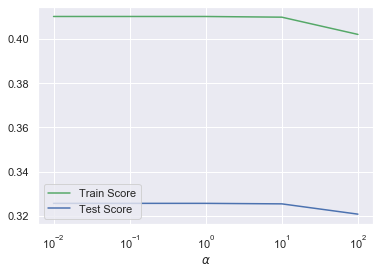

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [75]:
print(train_score_list)
print(test_score_list)

[0.4100562314166779, 0.4100561626654433, 0.41005190727787755, 0.40974015569825617, 0.401953477562613]
[0.3256049724011115, 0.3256066585715064, 0.3256043940410137, 0.3253774877801968, 0.3207289404678806]


In [76]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)

y_pred=ridge.predict(X_test)

print('Train score: {:.4f} '.format(ridge.score(X_train, y_train)))
print('Test score: {:.4f} '.format(ridge.score(X_test, y_test)))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 0.4100 
Test score: 0.3264 
RMSE: 96.4627


In [77]:
ridge.coef_

array([-1.43486336e+00,  2.61021380e+01,  3.18166786e+01,  3.64100567e+01,
       -2.13420967e+00, -6.20739722e+00,  2.12407292e+00,  1.69956249e-02,
       -1.06844951e+00, -1.45290846e+00, -1.80447549e+00,  1.71208925e+00,
        2.73078867e+00, -8.38534226e+00,  1.75635970e+00, -5.16173502e+00,
       -1.74837502e-01,  3.61954054e+00,  5.69534854e+00, -5.65394605e+00,
       -2.60370466e+00,  5.85538251e+00, -9.69033246e-01,  4.88829662e+00,
        5.56441322e-01, -1.28800250e+00,  2.17974345e-01, -2.60514079e+00,
        1.33853583e+00, -6.12013398e+00,  5.26258949e+00, -2.45421854e+01,
       -2.32922312e+01, -3.12706210e+01, -6.97926221e-01,  2.79159933e+00,
        3.23147011e+00, -4.07966658e+00, -7.08566211e-01,  1.09273053e+01,
       -8.94007757e+00, -6.18605857e+00, -7.08744388e-01,  7.08744388e-01,
       -7.97089541e-01, -4.63581658e+00,  2.54919044e+00,  9.85023372e+00])

In [78]:
ridge.intercept_

151.15007163323784

# 14. Ridge (unscaled data) with Grid search

In [79]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0,10,100])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train_org, y_train)
yPrediction2=grid.predict(X_test_org)

# summarize the results of the grid search
print ("Train Score:",grid.score(X_train_org, y_train))
print ("Test Score :",grid.score(X_test_org, y_test))
print("Best_Value_For_Alpha:",grid.best_estimator_.alpha)

c:\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14615e-19): result may not be accurate.
  overwrite_a=True).T
c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11666e-19): result may not be accurate.
  overwrite_a=True).T
c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16611e-20): result may not be accurate.
  overwrite_a=True).T
c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.1639e-20): result may not be accurate.
  overwrite_a=True).T
c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: 

Train Score: 0.401953477562613
Test Score : 0.3207289404678806
Best_Value_For_Alpha: 100.0


c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86528e-18): result may not be accurate.
  overwrite_a=True).T
c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.00975e-18): result may not be accurate.
  overwrite_a=True).T
c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78347e-17): result may not be accurate.
  overwrite_a=True).T
c:\python36\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.761e-17): result may not be accurate.
  overwrite_a=True).T
c:\python36\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python36\lib\s

In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, yPrediction2))
print('MSE:', metrics.mean_squared_error(y_test, yPrediction2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPrediction2)))
print("r2_Score:",r2_score(y_test, yPrediction2))

MAE: 49.806132066436724
MSE: 9383.229784413112
RMSE: 96.86707275650025
r2_Score: 0.3207289404678806


# 15. Lasso with scaled data

In [81]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

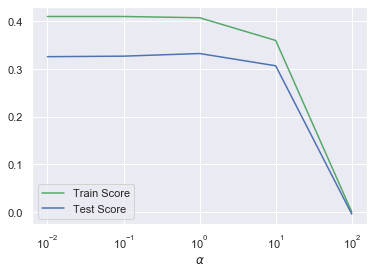

In [82]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [85]:
print(train_score_list)
print(test_score_list)

[0.41005513494328605, 0.41002223171366736, 0.4074129705759739, 0.3597856040867424, 0.0]
[0.32573776671447563, 0.3268157731349191, 0.3323515234134074, 0.30664962714516764, -0.004557160064553756]


In [86]:
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)

y_pred=lasso.predict(X_test)

print('Train score: {:.4f} '.format(lasso.score(X_train, y_train)))
print('Test score: {:.4f} '.format(lasso.score(X_test, y_test)))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 0.3598 
Test score: 0.3066 
RMSE: 97.8658


c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333930.3272595927, tolerance: 6016.212811998568
  positive)
c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73759.03842064366, tolerance: 6016.212811998568
  positive)
c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25603.94533330202, tolerance: 6016.212811998568
  positive)
c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10661.432907700539, tolerance: 6016.212811998568
  p

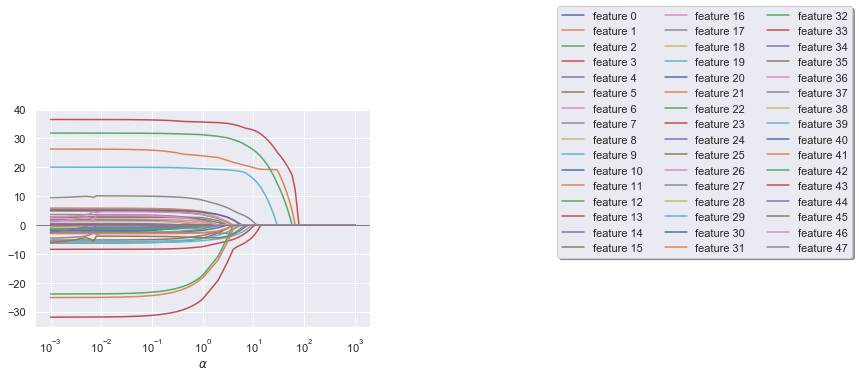

In [87]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,48):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(2, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# 16. Lasso (scaled data) with grid search

In [88]:
# Grid Search for Algorithm Tuning
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
param_grid = {
    'alpha': [100,10,1,0.1,0.01,0.001],
    'max_iter': [10e5]
    
}
# create and fit a lasso regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train, y_train)
yPredictions3 =grid.predict(X_test)


# summarize the results of the grid search
print ("Train Score:",grid.score(X_train, y_train))
print ("Test Score :",grid.score(X_test, y_test))
print("Best_Value_For_Alpha:",grid.best_params_)

c:\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train Score: 0.4074129705759739
Test Score : 0.3323515234134074
Best_Value_For_Alpha: {'alpha': 1, 'max_iter': 1000000.0}


c:\python36\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [89]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, yPredictions3))
print('MSE:', metrics.mean_squared_error(y_test, yPredictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPredictions3)))


from sklearn.metrics import r2_score

print("r2_Score:",r2_score(y_test, yPredictions3))

MAE: 49.03169740014935
MSE: 9222.679198699365
RMSE: 96.03478119254171
r2_Score: 0.33235152341340746


In [90]:
#Finding the most important variables from the daaset

def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)


lasso2 = Lasso(alpha=0.1, max_iter=10e5, tol=0.0001)
lasso2.fit(X_train,y_train)
train_score2=lasso2.score(X_train,y_train)
test_score2=lasso2.score(X_test,y_test)
coeff_used2 = np.sum(lasso2.coef_!=0)


print ("\ntraining score for alpha=0.1:", train_score2 )
print ("test score for alpha =0.1: ", test_score2)
print ("number of features used: for alpha =0.1:", coeff_used2)
print ("\nLasso model: ", pretty_print_linear(lasso2.coef_, sort = True))


training score for alpha=0.1: 0.41002223171366736
test score for alpha =0.1:  0.3268157731349191
number of features used: for alpha =0.1: 44

Lasso model:  36.436 * X3 + 31.796 * X2 + -31.284 * X33 + 25.951 * X1 + -24.413 * X31 + -23.251 * X32 + 20.005 * X39 + 9.996 * X47 + -8.336 * X13 + -6.07 * X5 + -6.011 * X29 + 5.744 * X21 + 5.611 * X18 + -5.591 * X19 + 5.186 * X30 + -5.034 * X15 + 4.781 * X23 + 4.532 * X36 + -3.893 * X45 + 3.449 * X17 + 3.193 * X46 + -2.957 * X41 + -2.761 * X37 + 2.756 * X12 + 2.738 * X35 + -2.522 * X20 + -2.501 * X27 + 2.007 * X6 + -1.855 * X4 + -1.664 * X10 + 1.535 * X11 + 1.527 * X14 + -1.371 * X9 + -1.325 * X42 + -1.273 * X0 + 1.234 * X28 + -1.153 * X25 + -0.969 * X8 + -0.867 * X22 + -0.623 * X34 + 0.436 * X24 + -0.057 * X16 + 0.031 * X26 + 0.0 * X43 + -0.0 * X7 + -0.0 * X38 + -0.0 * X40 + -0.0 * X44


# 17. Lasso with unscaled data

In [91]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_org,y_train)
    train_score_list.append(lasso.score(X_train_org,y_train))
    test_score_list.append(lasso.score(X_test_org, y_test))

Text(0.5, 0, '$\\alpha$')

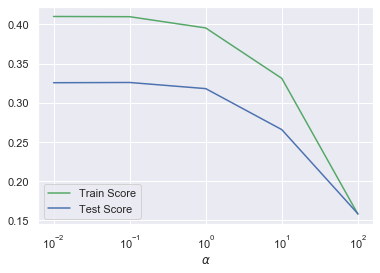

In [92]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [93]:
print(train_score_list)
print(test_score_list)

[0.41005191553729287, 0.4097759913242005, 0.3954156285777791, 0.3311045969922274, 0.15797288154195588]
[0.32557275587912915, 0.3258832424847238, 0.3180517200282622, 0.26574100856399263, 0.15845974299320087]


In [94]:
lasso = Lasso(alpha = 10)
lasso.fit(X_train_org,y_train)

y_pred=lasso.predict(X_test_org)

print('Train score: {:.4f} '.format(lasso.score(X_train_org, y_train)))
print('Test score: {:.4f} '.format(lasso.score(X_test_org, y_test)))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 0.3311 
Test score: 0.2657 
RMSE: 100.7115


c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17545662.435877208, tolerance: 6016.212811998568
  positive)


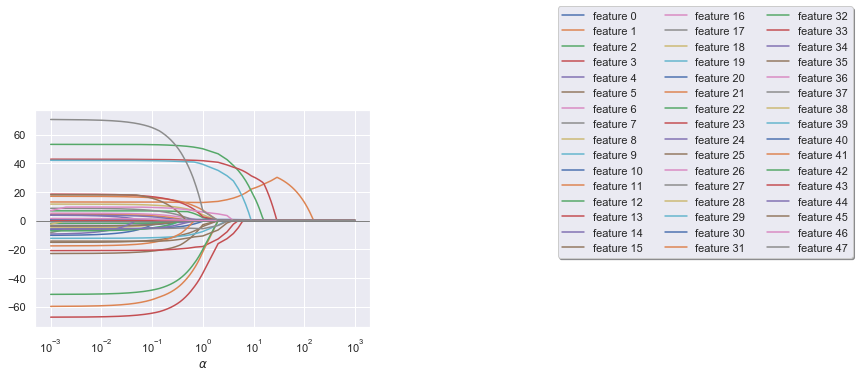

In [95]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_org,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,48):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(2, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# 18. Lasso (unscaled data) with grid search

In [96]:
# Grid Search for Algorithm Tuning
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
param_grid = {
    'alpha': [100,10,1,0.1,0.01,0.001],
    'max_iter': [10e5]
    
}
# create and fit a lasso regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train_org, y_train)
yPredictions3 =grid.predict(X_test_org)


# summarize the results of the grid search
print("Best_Value_For_Alpha:",grid.best_params_)

c:\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best_Value_For_Alpha: {'alpha': 100, 'max_iter': 1000000.0}


c:\python36\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [97]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, yPredictions3))
print('MSE:', metrics.mean_squared_error(y_test, yPredictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPredictions3)))


from sklearn.metrics import r2_score

print("r2_Score:",r2_score(y_test, yPredictions3))

MAE: 60.237756994969004
MSE: 11624.763772164626
RMSE: 107.8181977783186
r2_Score: 0.15845974299320087


In [98]:
#Finding the most important variables from the daaset

def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)


lasso2 = Lasso(alpha=0.1, max_iter=10e5, tol=0.0001)
lasso2.fit(X_train_org,y_train)
train_score2=lasso2.score(X_train_org,y_train)
test_score2=lasso2.score(X_test_org,y_test)
coeff_used2 = np.sum(lasso2.coef_!=0)


print ("\ntraining score for alpha=0.1:", train_score2 )
print ("test score for alpha =0.1: ", test_score2)
print ("number of features used: for alpha =0.1:", coeff_used2)
print ("\nLasso model: ", pretty_print_linear(lasso2.coef_, sort = True))


training score for alpha=0.1: 0.4097759913242005
test score for alpha =0.1:  0.3258832424847238
number of features used: for alpha =0.1: 42

Lasso model:  64.897 * X47 + -64.581 * X33 + -55.113 * X31 + 53.009 * X2 + -48.467 * X32 + 42.671 * X3 + 41.83 * X39 + -21.266 * X5 + -20.611 * X13 + 16.709 * X23 + 15.967 * X21 + 15.615 * X35 + -15.287 * X41 + -14.278 * X45 + -13.745 * X15 + 12.981 * X1 + -11.94 * X19 + 10.846 * X18 + 9.226 * X36 + 7.106 * X17 + 6.769 * X12 + -5.611 * X37 + -5.397 * X20 + -5.169 * X44 + -5.13 * X42 + -5.094 * X9 + 4.413 * X6 + 3.37 * X11 + -2.941 * X8 + -2.827 * X10 + -2.751 * X0 + -2.721 * X25 + 2.675 * X14 + -1.792 * X4 + -1.619 * X22 + 0.956 * X46 + 0.75 * X30 + -0.624 * X27 + -0.209 * X29 + 0.014 * X26 + 0.0 * X28 + 0.0 * X43 + -0.0 * X7 + -0.0 * X16 + 0.0 * X24 + -0.0 * X34 + -0.0 * X38 + 0.0 * X40


# 19. SVM with Kernels

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

for k in ['linear','poly','rbf','sigmoid']:
    clf1 = SVR(kernel=k, gamma='auto' )
    clf1.fit(X_train, y_train)
    c1 = clf1.score(X_train, y_train)
    confidence = clf1.score(X_test, y_test)
    print(k,"Test score", confidence)
    print(k,"Train score", c1)

linear Test score 0.3256220184870997
linear Train score 0.3286665221898605
poly Test score 0.10648447342775012
poly Train score 0.17851149547516543
rbf Test score 0.12061511707863881
rbf Train score 0.0667554808198274
sigmoid Test score 0.22915751925952133
sigmoid Train score 0.19492084431943002


# 20. SVM Regressor

In [100]:
from sklearn.svm import LinearSVR

sns.set(rc={'figure.figsize':(20,12)})
linear_svm = LinearSVR()

linear_svm.fit(X_train, y_train)
y_pred=linear_svm.predict(X_test)

train_score_array = []
test_score_array = []

for n in range(1,10):
    linear_svm = LinearSVR(max_iter=n)
    linear_svm.fit(X_train, y_train)
    train_score_array.append(linear_svm.score(X_train, y_train))
    test_score_array.append(linear_svm.score(X_test, y_test))

c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\svm\bas

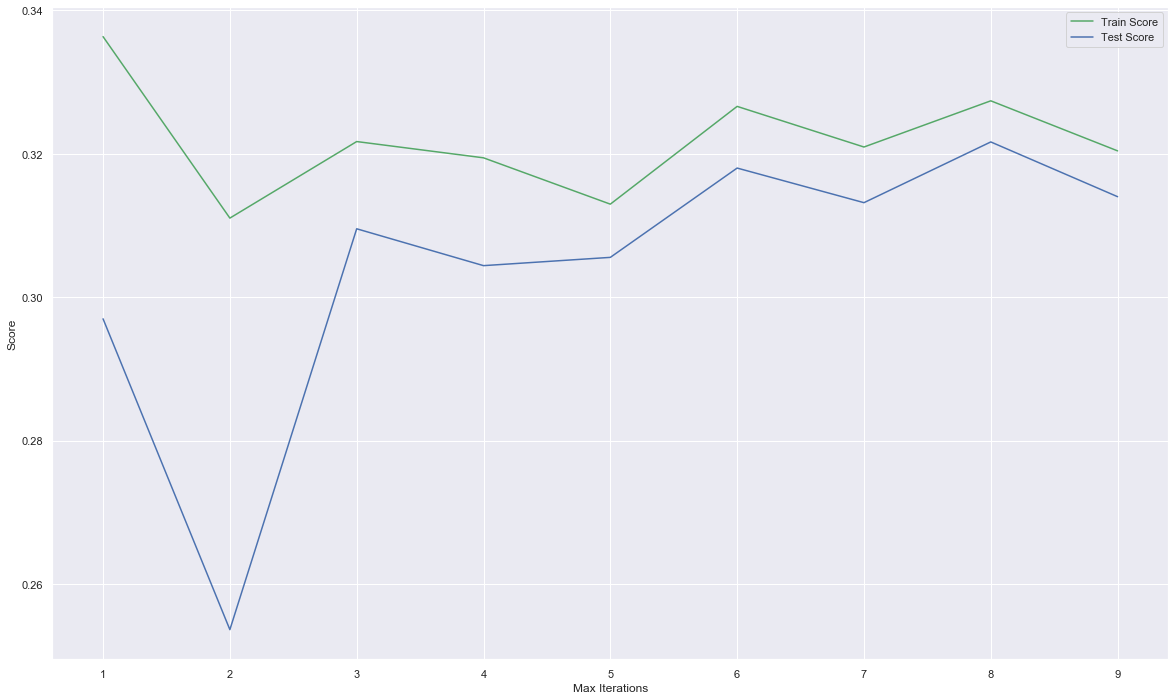

In [101]:
x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Score')
plt.show()

In [102]:
print(train_score_array)
print(test_score_array)

[0.3363555465772812, 0.3110512399804992, 0.3217251306973137, 0.31945642304064603, 0.3129957793616457, 0.3266291584070126, 0.3209636097101902, 0.32740480056869303, 0.32042603712628326]
[0.2970065210172089, 0.253665111593275, 0.30956166013361275, 0.3044223343628152, 0.3055756542462249, 0.3180290782088442, 0.3132031220781617, 0.3216722439054134, 0.3140353463060216]


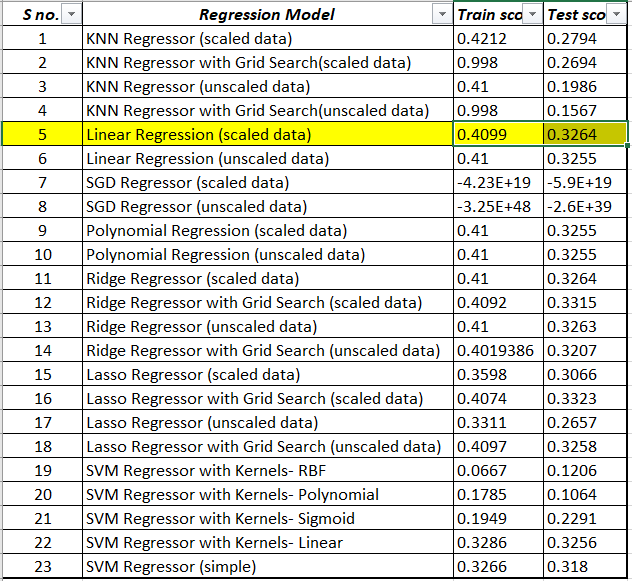

In [103]:
from IPython.display import Image
Image(filename = "F:\Fall 2019\Applied ML\Project\Comparison.png", width = 500, height = 300)

# Best Model

The best model for us is the Linear Regression Model with scaled data. The train scores for all our models is pretty similar and the test scores vary a little. So we chose the Linear Regression Model because the test score is closer to the train score as compared to other models. 

# Predict Target Values using the Best Model

We first use the Lasso Regressor (for scaled data) to identify the best parameters for our model.
And then, use the Linear Regression to train the model with the entire dataset and then use the test set (30% in this case) to predict the target values.

We got the following equation from the Lasso Regressor and so, we use this to find the best parameters to predict the model.

Lasso model:  36.444 * X3 + 31.786 * X2 + -31.288 * X33 + 25.958 * X1 + -24.417 * X31 + -23.255 * X32 + 20.006 * X39 + 9.999 * X47 + -8.337 * X13 + -6.071 * X5 + -6.009 * X29 + 5.745 * X21 + 5.611 * X18 + -5.592 * X19 + 5.184 * X30 + -5.034 * X15 + 4.781 * X23 + 4.533 * X36 + -3.894 * X45 + 3.446 * X17 + 3.193 * X46 + -2.954 * X41 + -2.759 * X37 + 2.756 * X12 + 2.737 * X35 + -2.522 * X20 + -2.5 * X27 + 2.008 * X6 + -1.862 * X4 + -1.665 * X10 + 1.536 * X11 + 1.526 * X14 + -1.37 * X9 + -1.326 * X42 + -1.272 * X0 + 1.234 * X28 + -1.153 * X25 + -0.969 * X8 + -0.866 * X22 + -0.624 * X34 + 0.436 * X24 + -0.057 * X16 + 0.03 * X26 + 0.0 * X43 + -0.0 * X7 + -0.0 * X38 + -0.0 * X40 + -0.0 * X44

Following are the selected parameters: 

'host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds','Kitchen', 'TV', 'Wireless Internet', 'Air Conditioning', 'Heating','Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector', 'First Aid Kit', 'Safety Card', 'Fire Extinguisher', 'Essentials', 'Shampoo', 'Parking ', 'Pets', 'Indoor Fireplace', 'Carbon Monoxide Detector', 'Breakfast', 'Smoking Allowed', 'Buzzer/Wireless Intercom', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'Reponse_time_within a day or more', 'Reponse_time_within a few hours', 'Reponse_time_within an hour', 'City_Other', 'City_Washington, D.C.', 'Property_Apartment', 'Property_House', 'Property_Other', 'room_Entire home/apt','room_Private room', 'room_Shared room', 'bed_Other', 'bed_Real Bed', 'cancellation_flexible', 'cancellation_moderate', 'cancellation_strict', 'cancellation_super_strict_30'

In [114]:
#Defining our dependent and independent variables 
X = df[['host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds','Kitchen', 'TV', 'Wireless Internet', 
        'Air Conditioning', 'Heating','Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector', 'First Aid Kit', 
        'Safety Card', 'Fire Extinguisher', 'Essentials', 'Shampoo', 'Parking ', 'Pets', 'Indoor Fireplace', 
        'Carbon Monoxide Detector', 'Breakfast', 'Smoking Allowed', 'Buzzer/Wireless Intercom', 'guests_included',
        'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'Reponse_time_within a day or more',
        'Reponse_time_within a few hours', 'Reponse_time_within an hour', 'City_Other', 'City_Washington, D.C.', 'Property_Apartment',
        'Property_House', 'Property_Other', 'room_Entire home/apt','room_Private room', 'room_Shared room', 'bed_Other', 
        'bed_Real Bed', 'cancellation_flexible', 'cancellation_moderate', 'cancellation_strict', 'cancellation_super_strict_30']]
y = df['Price']

In [115]:
#Replace all other NaN values in the dataset with the mean
X = X.fillna(df.mean()) 
X.isna().sum()

host_response_rate                   0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
Kitchen                              0
TV                                   0
Wireless Internet                    0
Air Conditioning                     0
Heating                              0
Family/Kid Friendly                  0
Washer                               0
Dryer                                0
Smoke Detector                       0
First Aid Kit                        0
Safety Card                          0
Fire Extinguisher                    0
Essentials                           0
Shampoo                              0
Parking                              0
Pets                                 0
Indoor Fireplace                     0
Carbon Monoxide Detector             0
Breakfast                            0
Smoking Allowed                      0
Buzzer/Wireless Intercom 

In [120]:
#Split the data to train and test sets
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.30)

In [121]:
#Standardize the training and test sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= scaler.fit_transform(X)
X_test = scaler.transform(X_test_org)

#Check the number of records in training and test partitions
print("X_train : " + str(X.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y.shape))
print("y_test : " + str(y_test.shape))

X_train : (3723, 48)
X_test : (1117, 48)
y_train : (3723,)
y_test : (1117,)


In [123]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X, y)   #Training the model on the entire dataset
yPrediction = lreg.predict(X_test)   #Predicting the target values of test set

print(lreg.score(X, y))
print(lreg.score(X_test, y_test))
print("\n Predicted values: ")

#Print the target values for the test set
yPrediction

0.39846086818621984
0.38457345989800784

 Predicted values: 


array([ 84.16464315, 285.61776815,  86.66464315, ..., 101.43026815,
       145.29061971, 167.73495565])

# Linear Regression was performed by Archita Jain